# Importancia relativa de los datos

Usaremos un regresor AdaBoost (adaptive Boosting)  para determinar la relevancia de los datos que se usan para clasificar puesto que en algunos casos son irrelevantes, entonces reduciendo las dimensiones podemos hacer que el algoritmo funcione mas rapido.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
#Abrimos los datos a usar 
housing_data = datasets.load_boston()

#Mezclamos los datos para no sesgar el analizador 
X,y = shuffle(housing_data.data, housing_data.target, random_state=7)

#dividimos los datos 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)


In [5]:
#Creamos el regresor AdaBoost
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=400, random_state=7)

In [6]:
#Evaluamos el rendimiento del regresor
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("\nADABOOST REGRESSOR")
print("Error cuadratico medio = ",round(mse, 2))
print("Puntaje de varianza = ", round(evs, 2))


ADABOOST REGRESSOR
Error cuadratico medio =  22.7
Puntaje de varianza =  0.79


Text(0.5, 1.0, 'Importancia de las caracteristicas usando resgresor AdaBoost')

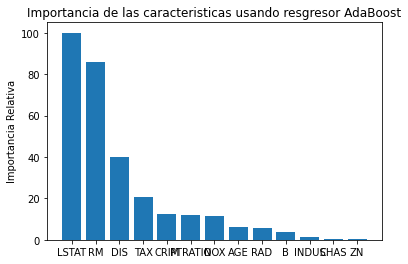

In [12]:
#Extraer las caracteristicas importantes 
feature_importances = regressor.feature_importances_
feature_names = housing_data.feature_names

#Normalizamos la importancia
feature_importances = 100.0 * (feature_importances / max(feature_importances))

#Ordenar 
index_sorted = np.flipud(np.argsort(feature_importances))
pos = np.arange(index_sorted.shape[0]) + 0.5

#Grafico de barras
plt.figure()
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Importancia Relativa')
plt.title('Importancia de las caracteristicas usando resgresor AdaBoost')